# CCADMACL (Midterm Exam)

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [2]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

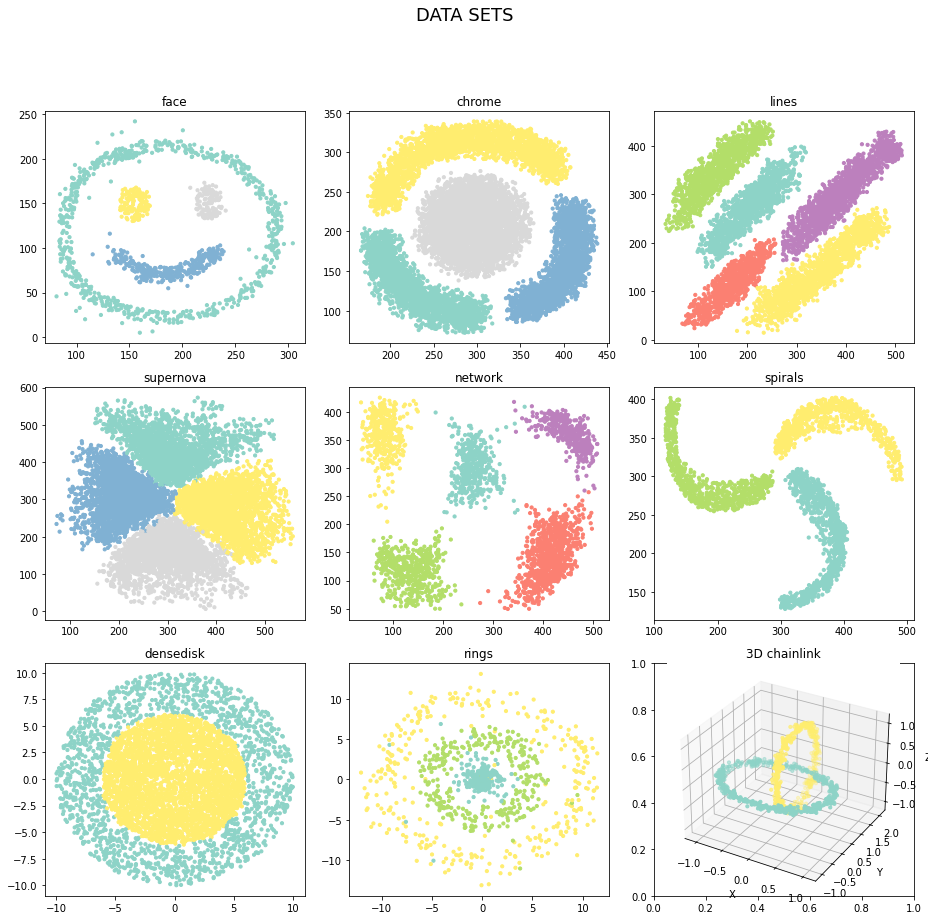

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [4]:
face_df_kmeans = face_df.copy()
chrome_df_kmeans = chrome_df.copy()
lines2_df_kmeans = lines2_df.copy()
supernova_df_kmeans = supernova_df.copy()
network_df_kmeans = network_df.copy()
spirals_df_kmeans = spirals_df.copy()
densedisk_df_kmeans =  densedisk_df.copy()
rings_df_kmeans = rings_df.copy()
chainlink_df_kmeans = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [5]:
face_df_kmeans.drop(['color'], axis = 1, inplace = True)
chrome_df_kmeans.drop(['color'], axis = 1, inplace = True)
lines2_df_kmeans.drop(['color'], axis = 1, inplace = True)
supernova_df_kmeans.drop(['color'], axis = 1, inplace = True)
network_df_kmeans.drop(['color'], axis = 1, inplace = True)
spirals_df_kmeans.drop(['color'], axis = 1, inplace = True)
densedisk_df_kmeans.drop(['color'], axis = 1, inplace = True)
rings_df_kmeans.drop(['color'], axis = 1, inplace = True)
chainlink_df_kmeans.drop(['color'], axis = 1, inplace = True)

3. Train a K-means model for each dataset.

In [6]:
face_kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
chrome_kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
lines2_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
supernova_kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
network_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
spirals_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
densedisk_kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
rings_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
chainlink_kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

y_kmeans_face = face_kmeans.fit_predict(face_df_kmeans)
y_kmeans_chrome = chrome_kmeans.fit_predict(chrome_df_kmeans) 
y_kmeans_lines2 = lines2_kmeans.fit_predict(lines2_df_kmeans)
y_kmeans_supernova = supernova_kmeans.fit_predict(supernova_df_kmeans)
y_kmeans_network = network_kmeans.fit_predict(network_df_kmeans)
y_kmeans_spirals = spirals_kmeans.fit_predict(spirals_df_kmeans)
y_kmeans_densedisk = densedisk_kmeans.fit_predict(densedisk_df_kmeans)
y_kmeans_rings = rings_kmeans.fit_predict(rings_df_kmeans)
y_kmeans_chainlink = chainlink_kmeans.fit_predict(chainlink_df_kmeans)

4. Add a "Cluster" column for each data set

In [7]:
face_df_kmeans['Cluster'] = y_kmeans_face
chrome_df_kmeans['Cluster'] = y_kmeans_chrome
lines2_df_kmeans['Cluster'] = y_kmeans_lines2
supernova_df_kmeans['Cluster'] = y_kmeans_supernova
network_df_kmeans['Cluster'] = y_kmeans_network
spirals_df_kmeans['Cluster'] = y_kmeans_spirals
densedisk_df_kmeans['Cluster'] = y_kmeans_densedisk
rings_df_kmeans['Cluster'] = y_kmeans_rings
chainlink_df_kmeans['Cluster'] = y_kmeans_chainlink

5. Plot the Correct cluster and the K-means cluster

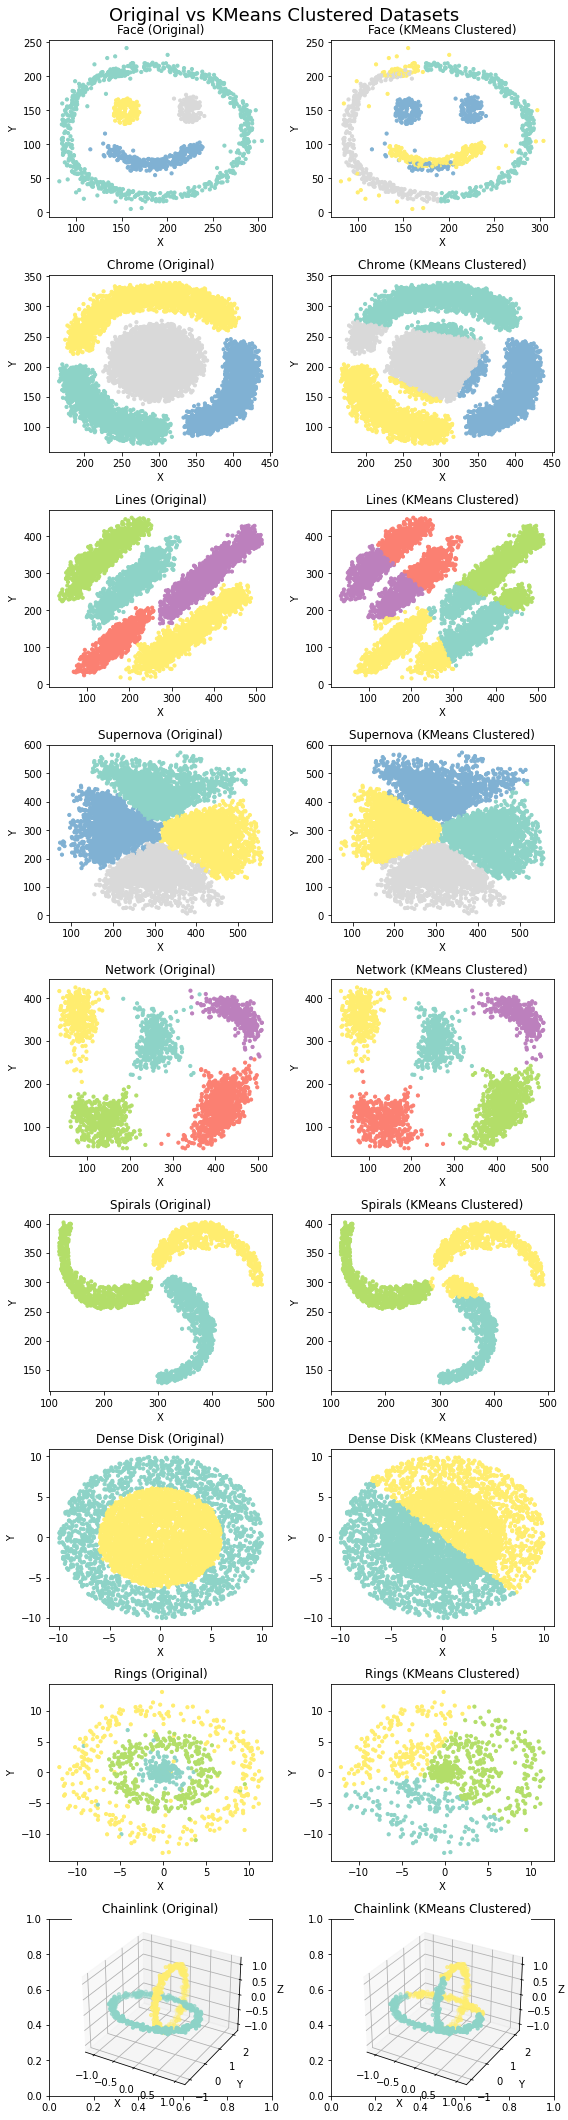

In [8]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(8, 30))
fig.suptitle('Original vs KMeans Clustered Datasets\n', size=18)

datasets = [
    ("Face", face_df, face_df_kmeans),
    ("Chrome", chrome_df, chrome_df_kmeans),
    ("Lines", lines2_df, lines2_df_kmeans),
    ("Supernova", supernova_df, supernova_df_kmeans),
    ("Network", network_df, network_df_kmeans),
    ("Spirals", spirals_df, spirals_df_kmeans),
    ("Dense Disk", densedisk_df, densedisk_df_kmeans),
    ("Rings", rings_df, rings_df_kmeans),
]

# Plot all datasets
for i, (name, original, kmeans) in enumerate(datasets):
    # Original dataset
    axes[i, 0].scatter(original['x'], original['y'], c=original['color'], s=10, cmap="Set3")
    axes[i, 0].set_title(f"{name} (Original)")
    axes[i, 0].set_xlabel("X")
    axes[i, 0].set_ylabel("Y")
    
    # KMeans-clustered dataset
    axes[i, 1].scatter(kmeans['x'], kmeans['y'], c=kmeans['Cluster'], s=10, cmap="Set3")
    axes[i, 1].set_title(f"{name} (KMeans Clustered)")
    axes[i, 1].set_xlabel("X")
    axes[i, 1].set_ylabel("Y")

# Add the 3D plot for Chainlink dataset
ax3d_orig = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_orig.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_orig.set_title("Chainlink (Original)")
ax3d_orig.set_xlabel("X")
ax3d_orig.set_ylabel("Y")
ax3d_orig.set_zlabel("Z")

ax3d_kmeans = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_kmeans.scatter(chainlink_df_kmeans['x'], chainlink_df_kmeans['y'], chainlink_df_kmeans['z'], c=chainlink_df_kmeans['Cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("Chainlink (KMeans Clustered)")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [9]:
face_df_agglomerative = face_df.copy()
chrome_df_agglomerative = chrome_df.copy()
lines2_df_agglomerative = lines2_df.copy()
supernova_df_agglomerative = supernova_df.copy()
network_df_agglomerative = network_df.copy()
spirals_df_agglomerative = spirals_df.copy()
densedisk_df_agglomerative =  densedisk_df.copy()
rings_df_agglomerative = rings_df.copy()
chainlink_df_agglomerative = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [10]:
face_df_agglomerative.drop(['color'], axis = 1, inplace = True)
chrome_df_agglomerative.drop(['color'], axis = 1, inplace = True)
lines2_df_agglomerative.drop(['color'], axis = 1, inplace = True)
supernova_df_agglomerative.drop(['color'], axis = 1, inplace = True)
network_df_agglomerative.drop(['color'], axis = 1, inplace = True)
spirals_df_agglomerative.drop(['color'], axis = 1, inplace = True)
densedisk_df_agglomerative.drop(['color'], axis = 1, inplace = True)
rings_df_agglomerative.drop(['color'], axis = 1, inplace = True)
chainlink_df_agglomerative.drop(['color'], axis = 1, inplace = True)

3. Train a Agglomerative Clustering model for each dataset.

In [11]:
face_agglomerative = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='ward')
chrome_agglomerative = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='ward')
lines2_agglomerative = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage='ward')
supernova_agglomerative = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='ward')
network_agglomerative = AgglomerativeClustering(n_clusters = 5, metric='euclidean', linkage='ward')
spirals_agglomerative = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward')
densedisk_agglomerative = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage='ward')
rings_agglomerative = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage='ward')
chainlink_agglomerative = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage='ward')

y_agglomerative_face = face_agglomerative.fit_predict(face_df_agglomerative)
y_agglomerative_chrome = chrome_agglomerative.fit_predict(chrome_df_agglomerative) 
y_agglomerative_lines2 = lines2_agglomerative.fit_predict(lines2_df_agglomerative)
y_agglomerative_supernova = supernova_agglomerative.fit_predict(supernova_df_agglomerative)
y_agglomerative_network = network_agglomerative.fit_predict(network_df_agglomerative)
y_agglomerative_spirals = spirals_agglomerative.fit_predict(spirals_df_agglomerative)
y_agglomerative_densedisk = densedisk_agglomerative.fit_predict(densedisk_df_agglomerative)
y_agglomerative_rings = rings_agglomerative.fit_predict(rings_df_agglomerative)
y_agglomerative_chainlink = chainlink_agglomerative.fit_predict(chainlink_df_agglomerative)

4. Add a "Cluster" column for each data set

In [12]:
face_df_agglomerative['Cluster'] = y_agglomerative_face
chrome_df_agglomerative['Cluster'] = y_agglomerative_chrome
lines2_df_agglomerative['Cluster'] = y_agglomerative_lines2
supernova_df_agglomerative['Cluster'] = y_agglomerative_supernova
network_df_agglomerative['Cluster'] = y_agglomerative_network
spirals_df_agglomerative['Cluster'] = y_agglomerative_spirals
densedisk_df_agglomerative['Cluster'] = y_agglomerative_densedisk
rings_df_agglomerative['Cluster'] = y_agglomerative_rings
chainlink_df_agglomerative['Cluster'] = y_agglomerative_chainlink

5. Plot the Correct cluster and the Agglomerative cluster

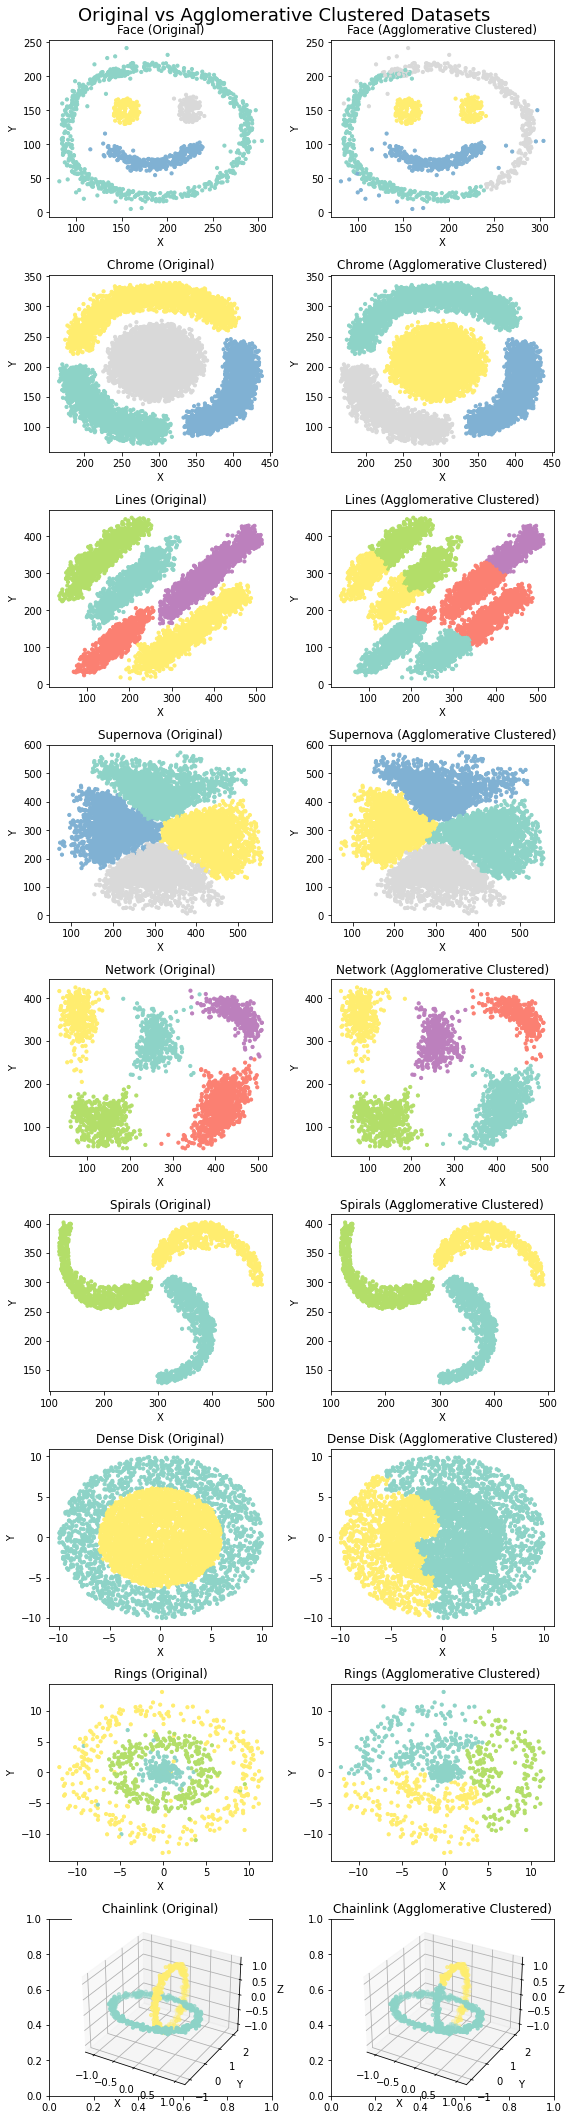

In [13]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(8, 30))
fig.suptitle('Original vs Agglomerative Clustered Datasets\n', size=18)

datasets = [
    ("Face", face_df, face_df_agglomerative),
    ("Chrome", chrome_df, chrome_df_agglomerative),
    ("Lines", lines2_df, lines2_df_agglomerative),
    ("Supernova", supernova_df, supernova_df_agglomerative),
    ("Network", network_df, network_df_agglomerative),
    ("Spirals", spirals_df, spirals_df_agglomerative),
    ("Dense Disk", densedisk_df, densedisk_df_agglomerative),
    ("Rings", rings_df, rings_df_agglomerative),
]

# Plot all datasets
for i, (name, original, kmeans) in enumerate(datasets):
    # Original dataset
    axes[i, 0].scatter(original['x'], original['y'], c=original['color'], s=10, cmap="Set3")
    axes[i, 0].set_title(f"{name} (Original)")
    axes[i, 0].set_xlabel("X")
    axes[i, 0].set_ylabel("Y")
    
    # KMeans-clustered dataset
    axes[i, 1].scatter(kmeans['x'], kmeans['y'], c=kmeans['Cluster'], s=10, cmap="Set3")
    axes[i, 1].set_title(f"{name} (Agglomerative Clustered)")
    axes[i, 1].set_xlabel("X")
    axes[i, 1].set_ylabel("Y")

# Add the 3D plot for Chainlink dataset
ax3d_orig = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_orig.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_orig.set_title("Chainlink (Original)")
ax3d_orig.set_xlabel("X")
ax3d_orig.set_ylabel("Y")
ax3d_orig.set_zlabel("Z")

ax3d_kmeans = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_kmeans.scatter(chainlink_df_agglomerative['x'], chainlink_df_agglomerative['y'], chainlink_df_agglomerative['z'], c=chainlink_df_agglomerative['Cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("Chainlink (Agglomerative Clustered)")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [14]:
face_df_dbscan = face_df.copy()
chrome_df_dbscan = chrome_df.copy()
lines2_df_dbscan = lines2_df.copy()
supernova_df_dbscan = supernova_df.copy()
network_df_dbscan = network_df.copy()
spirals_df_dbscan = spirals_df.copy()
densedisk_df_dbscan =  densedisk_df.copy()
rings_df_dbscan = rings_df.copy()
chainlink_df_dbscan = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [15]:
face_df_dbscan.drop(['color'], axis = 1, inplace = True)
chrome_df_dbscan.drop(['color'], axis = 1, inplace = True)
lines2_df_dbscan.drop(['color'], axis = 1, inplace = True)
supernova_df_dbscan.drop(['color'], axis = 1, inplace = True)
network_df_dbscan.drop(['color'], axis = 1, inplace = True)
spirals_df_dbscan.drop(['color'], axis = 1, inplace = True)
densedisk_df_dbscan.drop(['color'], axis = 1, inplace = True)
rings_df_dbscan.drop(['color'], axis = 1, inplace = True)
chainlink_df_dbscan.drop(['color'], axis = 1, inplace = True)

3. Train a DBSCAN Clustering model for each dataset.

In [16]:
face_dbscan = DBSCAN(eps=9.22, min_samples= 5, metric='euclidean') # 1274
chrome_dbscan = DBSCAN(eps=6.19, min_samples= 5, metric='euclidean') # 11094
lines2_dbscan = DBSCAN(eps=9.95, min_samples= 5, metric='euclidean') # 6196
supernova_dbscan = DBSCAN(eps=11, min_samples= 22, metric='euclidean') # 10715 
network_dbscan = DBSCAN(eps=18.13, min_samples= 5 , metric='euclidean') # 2635 
spirals_dbscan = DBSCAN(eps=6.70, min_samples= 5, metric='euclidean') # 2329
densedisk_dbscan = DBSCAN(eps=0.8, min_samples= 45 , metric='euclidean') # 5001
rings_dbscan = DBSCAN(eps=0.55, min_samples= 5, metric='euclidean') # 1001
chainlink_dbscan = DBSCAN(eps=0.11, min_samples= 6, metric='euclidean') # 1001

y_dbscan_face = face_dbscan.fit_predict(face_df_dbscan)
y_dbscan_chrome = chrome_dbscan.fit_predict(chrome_df_dbscan) 
y_dbscan_lines2 = lines2_dbscan.fit_predict(lines2_df_dbscan)
y_dbscan_supernova = supernova_dbscan.fit_predict(supernova_df_dbscan)
y_dbscan_network = network_dbscan.fit_predict(network_df_dbscan)
y_dbscan_spirals = spirals_dbscan.fit_predict(spirals_df_dbscan)
y_dbscan_densedisk = densedisk_dbscan.fit_predict(densedisk_df_dbscan)
y_dbscan_rings = rings_dbscan.fit_predict(rings_df_dbscan)
y_dbscan_chainlink = chainlink_dbscan.fit_predict(chainlink_df_dbscan)

4. Add a "Cluster" column for each data set

In [17]:
face_df_dbscan['Cluster'] = y_dbscan_face
chrome_df_dbscan['Cluster'] = y_dbscan_chrome
lines2_df_dbscan['Cluster'] = y_dbscan_lines2
supernova_df_dbscan['Cluster'] = y_dbscan_supernova
network_df_dbscan['Cluster'] = y_dbscan_network
spirals_df_dbscan['Cluster'] = y_dbscan_spirals
densedisk_df_dbscan['Cluster'] = y_dbscan_densedisk
rings_df_dbscan['Cluster'] = y_dbscan_rings
chainlink_df_dbscan['Cluster'] = y_dbscan_chainlink

5. Plot the Correct cluster and the DBSCAN cluster

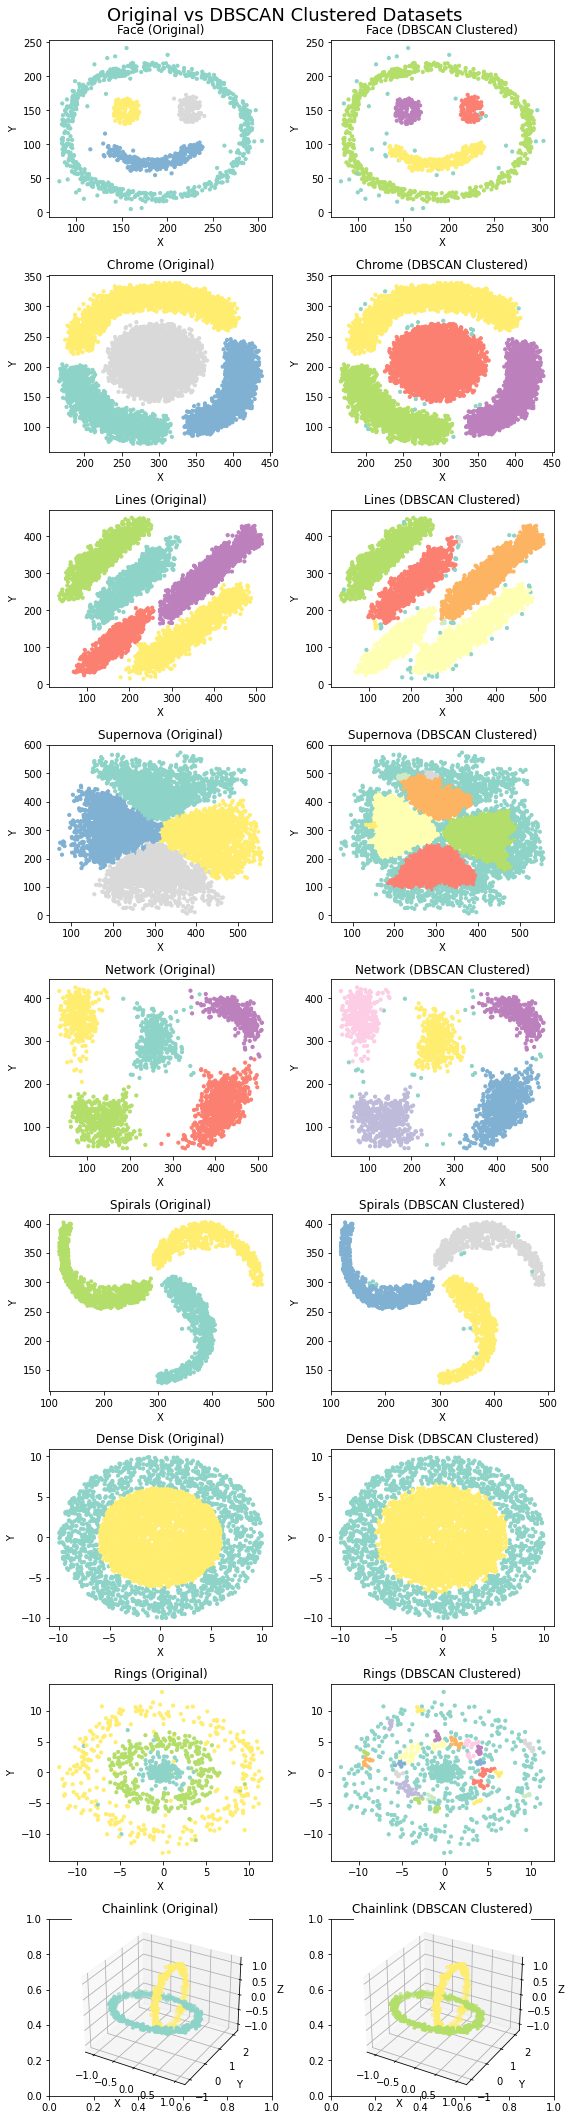

In [18]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(8, 30))
fig.suptitle('Original vs DBSCAN Clustered Datasets\n', size=18)

datasets = [
    ("Face", face_df, face_df_dbscan),
    ("Chrome", chrome_df, chrome_df_dbscan),
    ("Lines", lines2_df, lines2_df_dbscan),
    ("Supernova", supernova_df, supernova_df_dbscan),
    ("Network", network_df, network_df_dbscan),
    ("Spirals", spirals_df, spirals_df_dbscan),
    ("Dense Disk", densedisk_df, densedisk_df_dbscan),
    ("Rings", rings_df, rings_df_dbscan),
]

# Plot all datasets
for i, (name, original, kmeans) in enumerate(datasets):
    # Original dataset
    axes[i, 0].scatter(original['x'], original['y'], c=original['color'], s=10, cmap="Set3")
    axes[i, 0].set_title(f"{name} (Original)")
    axes[i, 0].set_xlabel("X")
    axes[i, 0].set_ylabel("Y")
    
    # KMeans-clustered dataset
    axes[i, 1].scatter(kmeans['x'], kmeans['y'], c=kmeans['Cluster'], s=10, cmap="Set3")
    axes[i, 1].set_title(f"{name} (DBSCAN Clustered)")
    axes[i, 1].set_xlabel("X")
    axes[i, 1].set_ylabel("Y")

# Add the 3D plot for Chainlink dataset
ax3d_orig = fig.add_subplot(9, 2, 17, projection='3d')
ax3d_orig.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d_orig.set_title("Chainlink (Original)")
ax3d_orig.set_xlabel("X")
ax3d_orig.set_ylabel("Y")
ax3d_orig.set_zlabel("Z")

ax3d_kmeans = fig.add_subplot(9, 2, 18, projection='3d')
ax3d_kmeans.scatter(chainlink_df_dbscan['x'], chainlink_df_dbscan['y'], chainlink_df_dbscan['z'], c=chainlink_df_dbscan['Cluster'], cmap="Set3", s=10)
ax3d_kmeans.set_title("Chainlink (DBSCAN Clustered)")
ax3d_kmeans.set_xlabel("X")
ax3d_kmeans.set_ylabel("Y")
ax3d_kmeans.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

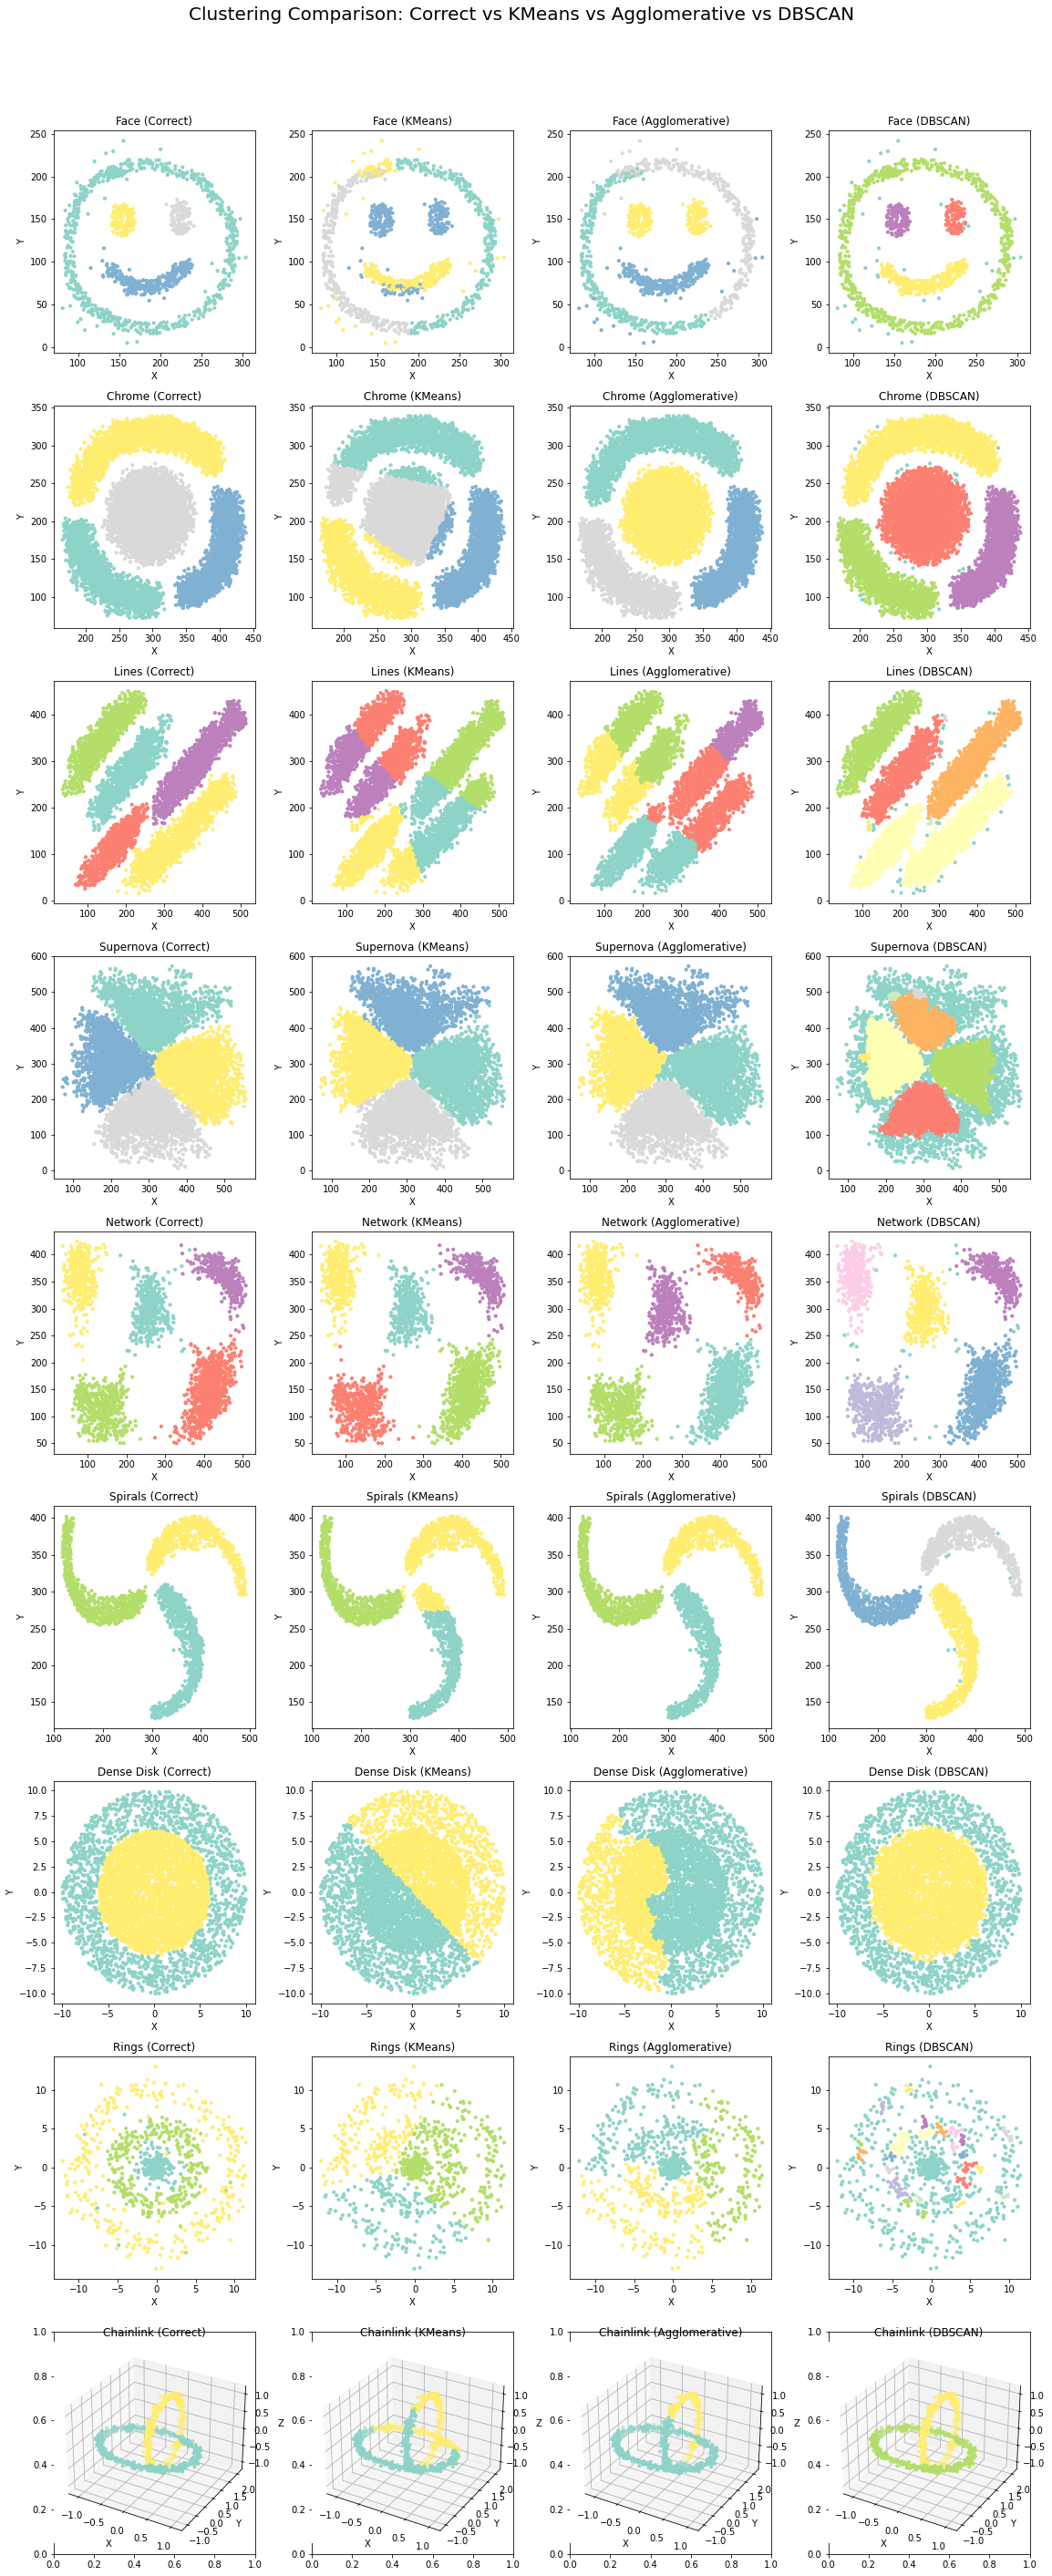

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define datasets
datasets = [
    ("Face", face_df, face_df_kmeans, face_df_agglomerative, face_df_dbscan),
    ("Chrome", chrome_df, chrome_df_kmeans, chrome_df_agglomerative, chrome_df_dbscan),
    ("Lines", lines2_df, lines2_df_kmeans, lines2_df_agglomerative, lines2_df_dbscan),
    ("Supernova", supernova_df, supernova_df_kmeans, supernova_df_agglomerative, supernova_df_dbscan),
    ("Network", network_df, network_df_kmeans, network_df_agglomerative, network_df_dbscan),
    ("Spirals", spirals_df, spirals_df_kmeans, spirals_df_agglomerative, spirals_df_dbscan),
    ("Dense Disk", densedisk_df, densedisk_df_kmeans, densedisk_df_agglomerative, densedisk_df_dbscan),
    ("Rings", rings_df, rings_df_kmeans, rings_df_agglomerative, rings_df_dbscan),
    ("Chainlink", chainlink_df, chainlink_df_kmeans, chainlink_df_agglomerative, chainlink_df_dbscan),
]

# Initialize figure
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(16, 40))
fig.suptitle('Clustering Comparison: Correct vs KMeans vs Agglomerative vs DBSCAN\n', size=20)

# Plot datasets
for i, (name, correct, kmeans, agglomerative, dbscan) in enumerate(datasets):
    # Plot Correct Clustering
    if name == "Chainlink":
        ax3d_correct = fig.add_subplot(9, 4, i * 4 + 1, projection='3d')
        ax3d_correct.scatter(correct['x'], correct['y'], correct['z'], c=correct['color'], cmap="Set3", s=10)
        ax3d_correct.set_title(f"{name} (Correct)")
        ax3d_correct.set_xlabel("X")
        ax3d_correct.set_ylabel("Y")
        ax3d_correct.set_zlabel("Z")
    else:
        axes[i, 0].scatter(correct['x'], correct['y'], c=correct['color'], s=10, cmap="Set3")
        axes[i, 0].set_title(f"{name} (Correct)")
        axes[i, 0].set_xlabel("X")
        axes[i, 0].set_ylabel("Y")
    
    # Plot KMeans Clustering
    if name == "Chainlink":
        ax3d_kmeans = fig.add_subplot(9, 4, i * 4 + 2, projection='3d')
        ax3d_kmeans.scatter(kmeans['x'], kmeans['y'], kmeans['z'], c=kmeans['Cluster'], cmap="Set3", s=10)
        ax3d_kmeans.set_title(f"{name} (KMeans)")
        ax3d_kmeans.set_xlabel("X")
        ax3d_kmeans.set_ylabel("Y")
        ax3d_kmeans.set_zlabel("Z")
    else:
        axes[i, 1].scatter(kmeans['x'], kmeans['y'], c=kmeans['Cluster'], s=10, cmap="Set3")
        axes[i, 1].set_title(f"{name} (KMeans)")
        axes[i, 1].set_xlabel("X")
        axes[i, 1].set_ylabel("Y")
    
    # Plot Agglomerative Clustering
    if name == "Chainlink":
        ax3d_agglo = fig.add_subplot(9, 4, i * 4 + 3, projection='3d')
        ax3d_agglo.scatter(agglomerative['x'], agglomerative['y'], agglomerative['z'], c=agglomerative['Cluster'], cmap="Set3", s=10)
        ax3d_agglo.set_title(f"{name} (Agglomerative)")
        ax3d_agglo.set_xlabel("X")
        ax3d_agglo.set_ylabel("Y")
        ax3d_agglo.set_zlabel("Z")
    else:
        axes[i, 2].scatter(agglomerative['x'], agglomerative['y'], c=agglomerative['Cluster'], s=10, cmap="Set3")
        axes[i, 2].set_title(f"{name} (Agglomerative)")
        axes[i, 2].set_xlabel("X")
        axes[i, 2].set_ylabel("Y")
    
    # Plot DBSCAN Clustering
    if name == "Chainlink":
        ax3d_dbscan = fig.add_subplot(9, 4, i * 4 + 4, projection='3d')
        ax3d_dbscan.scatter(dbscan['x'], dbscan['y'], dbscan['z'], c=dbscan['Cluster'], cmap="Set3", s=10)
        ax3d_dbscan.set_title(f"{name} (DBSCAN)")
        ax3d_dbscan.set_xlabel("X")
        ax3d_dbscan.set_ylabel("Y")
        ax3d_dbscan.set_zlabel("Z")
    else:
        axes[i, 3].scatter(dbscan['x'], dbscan['y'], c=dbscan['Cluster'], s=10, cmap="Set3")
        axes[i, 3].set_title(f"{name} (DBSCAN)")
        axes[i, 3].set_xlabel("X")
        axes[i, 3].set_ylabel("Y")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()